## Introduction 

![alt](pic2.jpg)


    
Titanic sadly sank during her maiden voyage after colliding with an iceberg, resulting unfortunately in the death of 1502 out of 2224 passengers and crew.

We'll explore the passengers dataset and  which Classification model will best predict whether passengers survived or not based on theirs features as (name, age, gender, socio-economic class, etc).

## Overview

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

Various features in the training set will be used to build your machine learning models and score thier accuracy.

For each passenger in the test set we will use our trained models to predict whether or not they survived the sinking of the Titanic. 

### Data Dictionary

* survival - Survival	0 = No, 1 = Yes 
* pclass - Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	- Sex	
* Age	- Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket -	Ticket number	
* fare	- Passenger fare	
* cabin	- Cabin number	
* embarked	- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
* pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



### Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

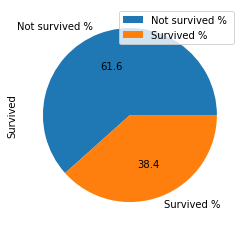

In [63]:
df.Survived.value_counts().plot.pie(autopct = "%.1f", labels = ["Not survived % ", "Survived % "], legend = True);

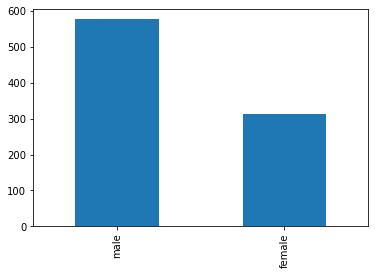

In [75]:
df.Sex.value_counts().plot(kind = "bar");

In [76]:
# number of survived Male vs Female
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


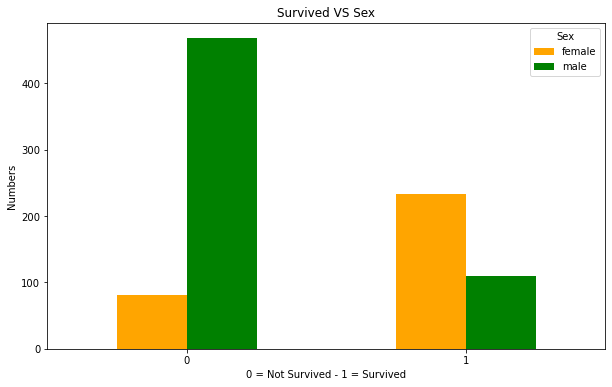

In [93]:
# visualize crosstab data
pd.crosstab(df.Survived, df.Sex).plot(kind = "bar", figsize = (10, 6), legend = True, color = ["orange", "green"])
plt.title("Survived VS Sex")
plt.xlabel("0 = Not Survived - 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation = "0");

We notice female survival rate is higher than Male, we can suggest this was due to giving periority to females and children to board lifeboats

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [95]:
# survival VS passengerClass
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [96]:
# plot 

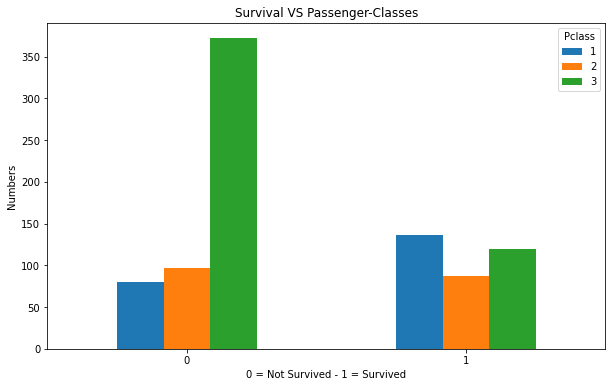

In [98]:
pd.crosstab(df.Survived, df.Pclass).plot(kind="bar", figsize=(10,6))
plt.title("Survival VS Passenger-Classes")
plt.xlabel("0 = Not Survived - 1 = Survived")
plt.ylabel("Numbers")
plt.xticks(rotation="0");

Survival numbers are quite equal between the three classes. however, the first class has survival rates over deceasing, the third class passengers have the highest frequency of not surviving, this maybe due to third class location on board Titanic away from lifboats and the fact that majority of passengers were third class as well (491 passenger)

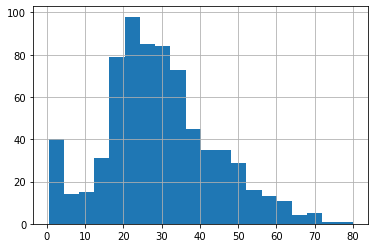

In [109]:
df.Age.hist(bins=20);

age distribution between 18 and 48, childern count around 40  

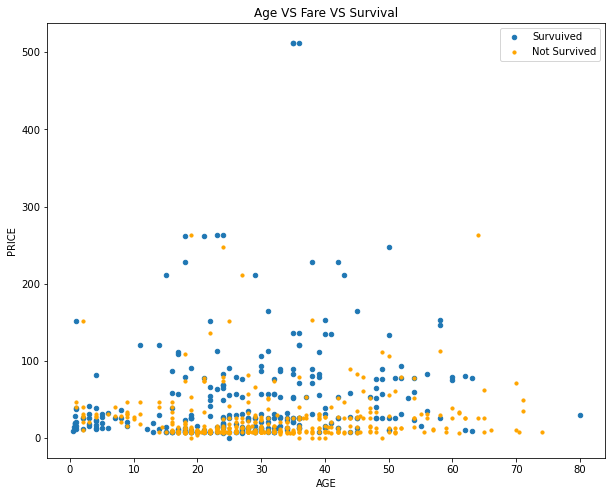

In [132]:
# relation between age VS sex VS survival
plt.figure(figsize=(10,8))
plt.scatter (df.Age[df.Survived==1],
            df.Fare[df.Survived==1], s=20)
plt.scatter(df.Age[df.Survived==0],
            df.Fare[df.Survived==0],
            color = "Orange", s= 10)
plt.title("Age VS Fare VS Survival")
plt.xlabel("AGE")
plt.ylabel("PRICE")
plt.legend(["Survuived", "Not Survived"]);


Oldest surviver was 80 years old ! most expencive tickets were bought at 500 USD !

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
# prepare our data
# drop less important columns
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Cabin", "Embarked", "Ticket"], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [189]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [190]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [191]:
# fill age missing values with mean value
df.Age.mean()

29.69911764705882

In [192]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [193]:
df["Age"].fillna(df.Age.mean(), inplace = True)

In [194]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [195]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [199]:
# change Sex from object to numeric value

df.Sex[df["Sex"]=="male"] = 1
df.Sex[df["Sex"]=="female"] = 0

C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [200]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [201]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [202]:
df["Sex"] = pd.to_numeric(df.Sex)

In [203]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object

In [204]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [205]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [208]:
from sklearn.model_selection import train_test_split

np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [210]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [212]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [213]:
model.score(X_test, y_test)

0.7932960893854749

In [237]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [238]:
linear_model.score(X_test, y_test)

0.31927037211647225

In [239]:
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier()
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [240]:
k_model.score(X_test, y_test)

0.6927374301675978

In [242]:
train_score = []
test_score = []

neighbors = np.arange(1,20, 1)

knn = KNeighborsClassifier()

for i in neighbors:
        knn.set_params(n_neighbors = i)
        knn.fit(X_train, y_train)
        test_score.append(knn.score(X_test, y_test))
        

In [246]:
print (test_score)

[0.6480446927374302, 0.6424581005586593, 0.6480446927374302, 0.6536312849162011, 0.6927374301675978, 0.659217877094972, 0.7094972067039106, 0.664804469273743, 0.7318435754189944, 0.6815642458100558, 0.6871508379888268, 0.6759776536312849, 0.6759776536312849, 0.659217877094972, 0.664804469273743, 0.659217877094972, 0.664804469273743, 0.664804469273743, 0.664804469273743]


In [220]:
%%time
# hyperparameters tuning using GridSearch cv
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(1, 1200, 70),
        "max_depth" : [None, 3, 5, 10],
        "min_samples_leaf" : np.arange(1, 10, 2),
        "min_samples_split" : np.arange(2, 10, 2)}

model = RandomForestClassifier(n_jobs = -1)

gs_model = GridSearchCV(estimator = model,
                        param_grid = grid,
                        cv = 3,
                        n_jobs =-1,
                        verbose = True)
gs_model.fit  (X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 39.4min finished


Wall time: 39min 25s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([   1,   71,  141,  211,  281,  351,  421,  491,  561,  631,  701,
        771,  841,  911,  981, 1051, 1121, 1191])},
             verbose=True)

In [221]:
gs_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 351}

In [227]:
gs_model.score(X_test, y_test)

0.7988826815642458

In [223]:
best_model = RandomForestClassifier(n_estimators = 351,
                                    max_depth = None,
                                    min_samples_leaf = 1,
                                    min_samples_split = 4)


In [225]:
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=351)

In [226]:
best_model.score(X_test, y_test)

0.8044692737430168

In [228]:
y_preds = best_model.predict(X_test)

In [229]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score



In [230]:
model_scores = {"precision score" : precision_score(y_test, y_preds),
                "recall score" : recall_score(y_test, y_preds),
                "F1 score" : f1_score(y_test, y_preds)}

In [231]:
print (model_scores)

{'precision score': 0.8793103448275862, 'recall score': 0.6455696202531646, 'F1 score': 0.7445255474452555}


In [232]:
confusion_matrix(y_test, y_preds)

array([[93,  7],
       [28, 51]], dtype=int64)

In [234]:
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       100
           1       0.88      0.65      0.74        79

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.82      0.80      0.80       179



In [253]:
confusion_matrix(y_test, y_preds)

array([[93,  7],
       [28, 51]], dtype=int64)

In [271]:
# Import testing samples
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [278]:
# dataframe preprocessing
df_test.drop(["PassengerId", "Name", "SibSp", "Parch", "Cabin", "Embarked", "Ticket"], axis = 1, inplace = True)
df_test["Age"].fillna(df_test.Age.mean(), inplace = True)
df_test["Fare"].fillna(df_test.Fare.mean(), inplace = True)
df_test.Sex[df["Sex"]=="male"] = 1
df_test.Sex[df["Sex"]=="female"] = 0
df_test["Sex"] = pd.to_numeric(df.Sex)
df_test.head()

C:\users\lenovo\ztm\projects\env\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\users\lenovo\ztm\projects\env\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\users\lenovo\ztm\projects\env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


In [266]:
df_test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [267]:
y_test_preds = best_model.predict(df_test)
y_test_preds

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [274]:
df_final["PassengerId"] = df_test["PassengerId"]
df_final["Survived"] = y_test_preds
df_final.drop("y_test_preds", axis = 1, inplace = True)
df_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [277]:
df_final.to_csv("Titanic_Submission.csv", index = False)

In [279]:
y_model_preds = model.predict(df_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.